# Example loader for PLE scan results
Nick Yama, 11 July 2025

Example jupyter notebook for loading in `qt3ple` scan file results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [6]:
with h5py.File('test-1_20250716.hdf5', 'r') as df:
    df.visit(print)
    counts = np.array(df['upscan_counter_rate'])
    diode = np.array(df['upscan_photodiode_voltage'])

with h5py.File('test-2_20250716.hdf5', 'r') as df:
    newport = np.array(df['upscan_photodiode_voltage'])

counter_rate
downscan_counter_rate
downscan_photodiode_voltage
downscan_scan_laser_voltage
downscan_subpixel_counter_rate
downscan_subpixel_photodiode_voltage
downscan_subpixel_scan_laser_voltage
downscan_wavemeter_tags
downscan_wavemeter_vals
file_metadata
photodiode_voltage
repump_repump_laser_voltage
scan_laser_voltage
scan_parameters
upscan_counter_rate
upscan_photodiode_voltage
upscan_scan_laser_voltage
upscan_subpixel_counter_rate
upscan_subpixel_photodiode_voltage
upscan_subpixel_scan_laser_voltage
upscan_wavemeter_tags
upscan_wavemeter_vals


In [3]:
norm1 = [(y1 - 450)/y2 for y1,y2 in zip(counts,diode)]
norm1 = [x/np.max(x) for x in norm1]
norm2 = [(y1 - 450)/(y2-0.003) for y1,y2 in zip(counts,newport)]
norm2 = [x/np.max(x) for x in norm2]

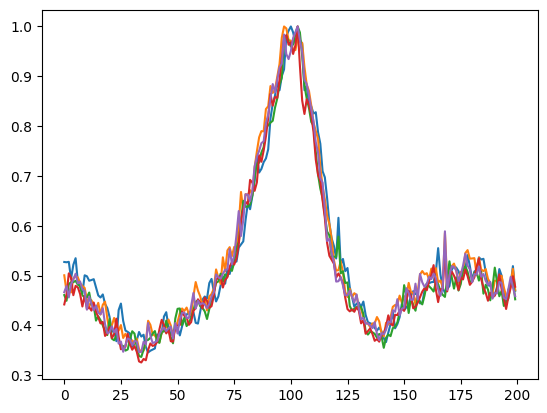

In [4]:
for y in norm1:
    plt.plot(y)

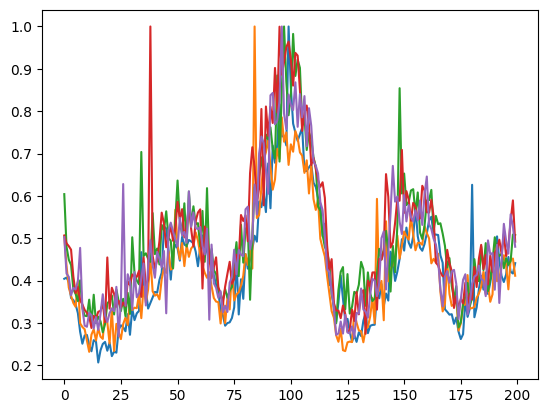

In [5]:
for y in norm2:
    plt.plot(y)

In [ ]:
for y1,y2 in zip(norm1, norm2):

    

In [12]:
with h5py.File('example_output.hdf5', 'r') as df:

    # This method searches the entire hdf5 file running the callback
    # `print()` (the built-in Python function) on each branch.
    print('Scanning through hdf5 file:')
    df.visititems(print)

    # File metadata information is stored in attributes of the 
    # file_metadata dataset as metadata. The attributes are listed
    # in the file_metadata dataset itself
    metadata_keys = list(df['file_metadata'])
    print('\nFile metadata keys:')
    print(metadata_keys)
    # HDF5 has some issues with lists of strings hence the weird
    # b'...' format, but it seems to work fine
    print('\nListing file metadata via attributes:')
    for key in metadata_keys:
        print(str(key)  + ': ' + df['file_metadata'].attrs[key])

    # Example for loading results from the main data group
    pixel_voltages_up = np.array(df['data/pixel_voltages_up'])
    pixel_voltages_down = np.array(df['data/pixel_voltages_down'])
    upscan_counts = np.array(df['data/upscan_counts'])
    downscan_counts = np.array(df['data/downscan_counts'])
    scan_counts = np.array(df['data/scan_counts'])

    # Loading datasets of single values can be awkward
    # If we simply try to get the dataset the output will be
    # a h5py datastructure....
    print('\nIncorrect loading of single-valued dataset:')
    print(df['scan_settings/n_pixels_up'])
    # To load it correctly you need to get the entry
    n_pixels_up = int(df['scan_settings/n_pixels_up'][()])
    print('n_pixels_up:', n_pixels_up)

    # You can also access the metadata
    # All entries in data and scan_settings have these attributes
    print('\nPrinting metadata for data/pixel_voltages_up:')
    units = df['data/pixel_voltages_up'].attrs['units']
    description = df['data/pixel_voltages_up'].attrs['description']
    print(f'Units: {units}')
    print(f'Description: {description}')

Scanning through hdf5 file:
data <HDF5 group "/data" (7 members)>
data/downscan_counts <HDF5 dataset "downscan_counts": shape (3, 10), type "<f8">
data/pixel_voltages_down <HDF5 dataset "pixel_voltages_down": shape (10,), type "<f8">
data/pixel_voltages_up <HDF5 dataset "pixel_voltages_up": shape (150,), type "<f8">
data/sample_voltages_down <HDF5 dataset "sample_voltages_down": shape (40,), type "<f8">
data/sample_voltages_up <HDF5 dataset "sample_voltages_up": shape (600,), type "<f8">
data/scan_counts <HDF5 dataset "scan_counts": shape (3, 160), type "<f8">
data/upscan_counts <HDF5 dataset "upscan_counts": shape (3, 150), type "<f8">
file_metadata <HDF5 dataset "file_metadata": shape (5,), type "|S16">
scan_settings <HDF5 group "/scan_settings" (17 members)>
scan_settings/max <HDF5 dataset "max": shape (), type "<f8">
scan_settings/min <HDF5 dataset "min": shape (), type "<f8">
scan_settings/n_pixels_down <HDF5 dataset "n_pixels_down": shape (), type "<i8">
scan_settings/n_pixels_up

Any variables that are `h5py` datastructures (simple copies of `df[...]`) are closed outside of the `with` and will be inaccessable.

Variables that have been converted via typecasting (e.g. `np.array(df[...])`) are retained.

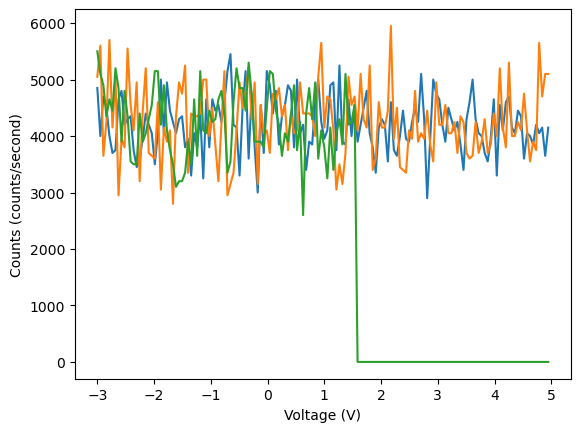

In [14]:
# Plot each of the three recorded upscans
plt.plot(pixel_voltages_up, upscan_counts[0])
plt.plot(pixel_voltages_up, upscan_counts[1])
plt.plot(pixel_voltages_up, upscan_counts[2])
plt.xlabel('Voltage (V)')
plt.ylabel('Counts (counts/second)')
plt.show()

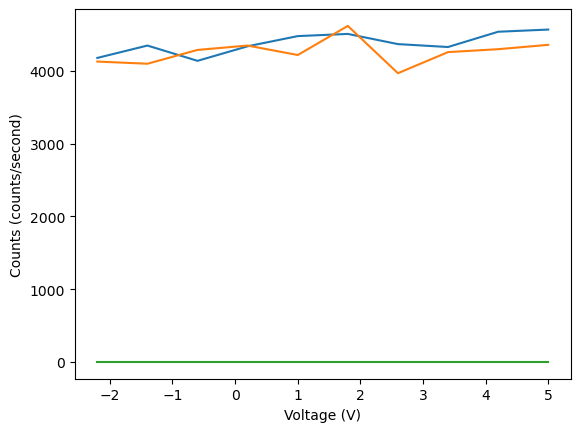

In [15]:
# Plot each of the three recorded downscans
plt.plot(pixel_voltages_down, downscan_counts[0])
plt.plot(pixel_voltages_down, downscan_counts[1])
plt.plot(pixel_voltages_down, downscan_counts[2])
plt.xlabel('Voltage (V)')
plt.ylabel('Counts (counts/second)')
plt.show()

Text(0, 0.5, 'Volts')

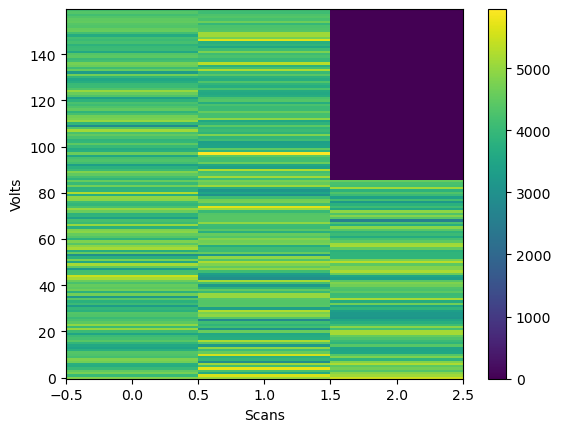

In [16]:
# Plot the full scans
# In order to replicate the figure in the GUI you will need to follow the
# process described in main.DataViewport.update_image().
plt.imshow(scan_counts.T, aspect='auto', interpolation='none', origin='lower')
plt.colorbar()
plt.xlabel('Scans')
plt.ylabel('Voltage samples')
plt.show()

The saved image from `qt3ple` is copied below:

<div>
<img src="./example_output.png" width="500">
</div>
